# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [3]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices, ddof=1) # to get the same number as in pandas

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165340.27765266786


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

>To better understand the relationships between the features and median prices of the homes, we take a look at the following three plots:

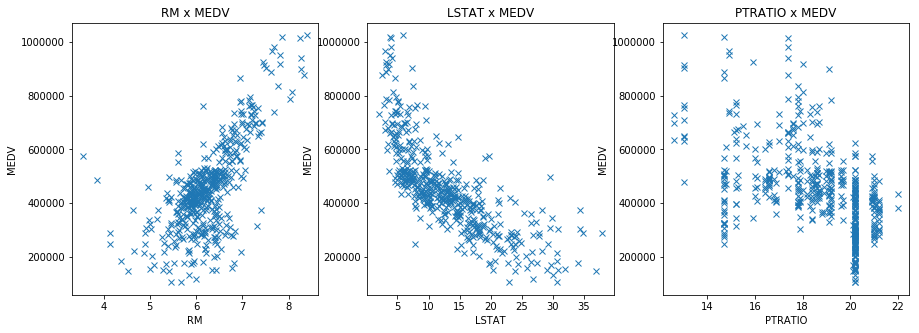

In [4]:
# courtesy of the first reviewer

import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

for i, col in enumerate(features.columns):
    plt.subplot(1,3,i+1)
    plt.plot(data[col], prices, 'x')
    plt.title( '%s x MEDV' % col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

**Answer: **

* An increase in 'RM', the average number of rooms per home, will lead to an increase in the median value 'MEDV' of the homes. 

>In most cases more rooms mean more square footage thus a price increase. Also extra rooms would add various features (such as bedrooms, office space, den, etc.) which could be regarded as bonus or luxury additions and therefore increase the price of the home.

* An increase in either 'LSTAT' or 'PTRATIO' would more likely lead to a decrease in the median value 'MEDV' of the homes in that neighborhood.

>A higher percentage of lower class workers could mean that the houses they own are cheaper, smaller or of lower quality, and it would mostly imply that the rest of the houses in that area are also built poorly or they lack certain desirable amenities.

>Usually the quality of the education increases if the student receives more attention and personalized instruction, thus a school district with a lower student-teacher ratio is more desirable than one where this ratio is larger. Hence smaller student-teacher ratios would probably lead to an increase to the value of the homes.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [5]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score


def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict) 
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [6]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**
>According to the performance metric used here, i.e. the R2 score, the model successfully captures the variation of the target variable. With an R2 score of 0.923, about 90% of the variance of the target variable is predictable from the input variable. 

> In general, in order to conclude that a model is good other performance metrics should be investigated. Also a plot of the observed data and the predicted values of the data will reveal a lot about the model. 

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [7]:
# TODO: Import 'train_test_split'
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.20, random_state=42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **

>To evaluate a machine learning algorithm we must design a quantitative measure of its performance that is specific to the task carried by the system, a performance metric (accuracy or error rate for example). Typically, the algorithm is trained on a training set and the performance metric is optimized on this set, which implies minimizing the training error. 

>But, in machine learning, the algorithm must perform well on previously unseen data, it has to generalize well. In order to determine how well the algorithm performs in the real world, we evaluate the performance metric using a set of the data that is _separate_ from the data used for training. This is the test set and a testing error is computed. 

>We expect the testing eror to be greater or equal to the training error. Then the performance of the algorithm is measured by its ability to make the training error small and to make the gap between the training and the testing errors small. 

>When the training error is not sufficiently low, the model is underfit. Oversimplyfing leads to a model that performs poorly on the training set.  

>If the gap between the training and the testing error is too large, the model is overfit. The model will pretty much memorize the dataset without being able to properly generalize to new data. Such a model will perform well on the training set but poorly on a testing set.

>_It is imperative that the test set is separate from the training set._ Therefore the necessity of splitting the data into a ratio of training and testing subsets. This ratio has to carefully chosen so that both overfitting and underfitting are avoided. From what I see in the literature and the information available on the internet, many people use a 70:30 ratio, where about 70% of the data is used for training.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

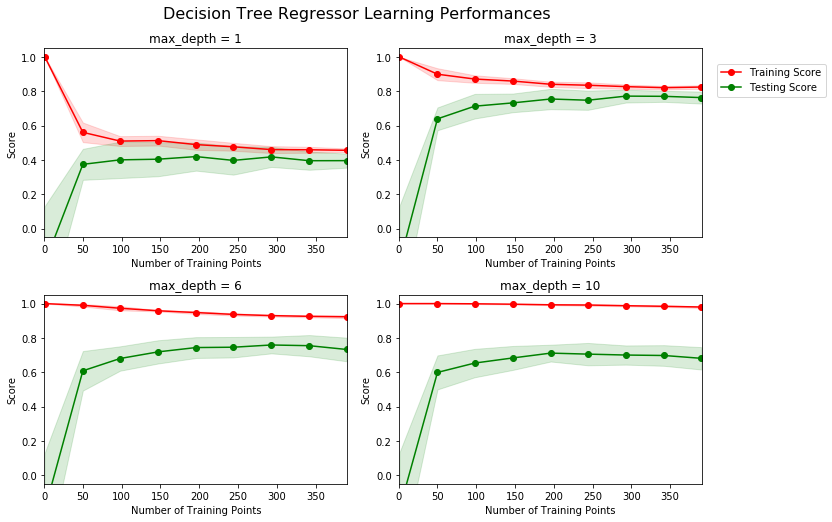

In [8]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **

>__The decision tree with max_depth = 3__. As more training points are added, the training curve seems to stabilize around a score of 0.8. The testing scores also approaches values close to 0.8 when the number of training points is increased. Since both the training score curve and the testing score curve converge to a score of 0.8 with the increase of the number of training points, adding more points will not benefit the model. They two scores seem to stabilize around the value 0.8 when the number of training points is at least 300.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

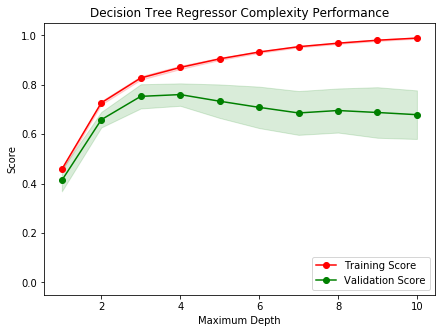

In [9]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: **

> __The model trained with a maximum depth of 1.__
The training score and the validation score are both low and have close values. In this case the model suffers from high bias, relevant relations among the parameters might be overlooked. The model is underfit. 

> __The model trained with a maximum depth of 10.__
In this case the model shows overfitting, it has a high variance. The training score is high which shows that the model fits the training data very well. However, the validation score is much lower, the upper bound of the uncertainty region does not get close to the training score either. The lower validation score indicates that the model performs poorly on training data, it does not generalize well. 

#### Addendum: Underfitting vs. Overfitting

>From [Scikit Learn](http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html).

>The example below demonstrates the problems of underfitting and overfitting and how we can use linear regression with polynomial features to approximate nonlinear functions. We can see that a linear function is not sufficient to fit the training samples. This is called underfitting. A polynomial of degree 4 approximates the true function almost perfectly. However, for higher degrees the model will overfit the training data.

![bla](sklearn_under-overfitting.png)

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **
> From the Decision Tree Regressor Complexity Performance graph, we see that there is a steep increase in the performance score for both training and validation data as the maximum depth increases from 1 to 2. Next we notice that if the maximum depth is higher than 4, the training score increases while the validation score decreases, and this indicates overfitting. The validation score reaches its largest value when the maximum depth is 4.

> For maximum depths of 3 and 4, the two performance scores have close acceptable values. Since the validation score is higher for depth 4, I would choose this model as a best fit for our dataset (even though it is slightly more complex than the degree 3 model). The high performance score for the validation set indicates that the model is not underfit, while the value gap between the training score and the validation score indicates that the model is not overfit either.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **

> A machine learning model is comprised of a formula or a set of formulas. These expressions involve parameters (or coefficients). These _regular_ parameters are determined from the features of the dataset. Besides these parameters, there are so-called _hyper-parameters_, these are independent of the data and are usually chosen before the model is fitted, they characterize the algorithm itself. Examples of hyper-parameters are: the degree of the polynomial in a regression model, the maximum depth in a decision tree model or the kernel in a support vector machine model. 

> The data is split into training, cross-validation and testing sets. The training set is used to train the parameters, the cross validation set is used to make decisions about the model (evaluate the model), the testing set is used for the final testing of the model. Several models (including their hyper-parameters) are chosen, the models are fitted on the training set. Using the cross validation set we evaluate the performance of each model by computing a certain metric, such as F1 score or R2 score. The model with the best score is picked and it is verified on the testing set. 

> There is a correspondence between the evaluation metric and the set of hyper-parameters chosen for the model. In practical setting, this relation is not usually a differentiable function, which eliminates standard methods of finding extreme values. Also, finding the particular values of this metric means solving the problem each time, hence it is not feasible to compute numerous such values. 

> If the model has n hyper-parameters, then we can compute the evaluation metric for certain n-tuples of values of these hyper-parameters. When only two hyper-parameters are used, the data can be conveniently presented in a table or grid. By inspecting the information in such a grid one can easily select the model that performs best on the cross validation set. Finally, this model is applied to the testing set.

> In the 'Grid Search Lab' from the 'Model Selection' lecture the following example was used to perform a grid search on the given dataset. A decision tree model is fitted. The hyper-parameters are the max_depth (the maximum depth), min_samples_split (the minimum number of samples required to split an internal node) and min_samples_leaf (the minimum number of samples to be a leaf node). An F_1 score is computed for triples of values of these hyper-parameters.

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **

>In the grid search method it is assumed that there is enough data to split into the three subsets: training, validation and testing. This implies that part of the training data is used to get predictions on the model. In some applications we do not want to use any of the training data on validation.

>In k-fold cross validation, the randomly shuffled training data is split into k buckets. Each group is used once as a testing set for the model, while the remaining k-1 buckets form the training set. The model is fitted on the training set and evaluated on the testing set. An evaluation score is computed. This procedure is repeated k times, so that each bucket is used exactly once as a testing set and k-1 times in a training set. We average the results to get a final model.

>k-fold cross validation is used for chosing the optimal set of hyper-parameters for the model, after which the model (tuned with these hyper-parameters) is retrained on the whole training set.  Specifically, the k-fold cross validation minimizes the risk of overfitting the hyper-parameters on the training set.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [10]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':list(range(1,11))}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring_fnc, cv= cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [11]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: **
> The optimal model has a maximum depth of 4, which is in accordance with my guess from Question 6.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [12]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


**Answer: **

> The computations from Data Exploration give the 5 numbers statistics for the median value MEDV of a home. From these numbers we can also compute the 95% confidence interval:

In [13]:
CI_lower = mean_price - 1.96 * std_price
CI_upper = mean_price + 1.96 * std_price
CI = [round(CI_lower,1), round(CI_upper,1)]
print("Confidence interval for MEDV is {}.".format(CI))

Confidence interval for MEDV is [130276.0, 778409.9].


> First observe that the min_price is about 2 standard deviations from the mean_price. 

In [14]:
z_min = (minimum_price - mean_price)/std_price
print("z value for the minimum price is {}.".format(round(z_min,2)))

z value for the minimum price is -2.11.


> Next, the z value of the maximum price is:  

In [15]:
z_max = (maximum_price - mean_price)/std_price
print("z value for the maximum price is {}.".format(round(z_max,2)))

z value for the maximum price is 3.45.


> Therefore the minimum price is close to the lower end of the confidence interval, while the maximum price is in fact an outlier. These can be easily observed in the boxplots below. We will take these observations account when evaluating the three homes. 

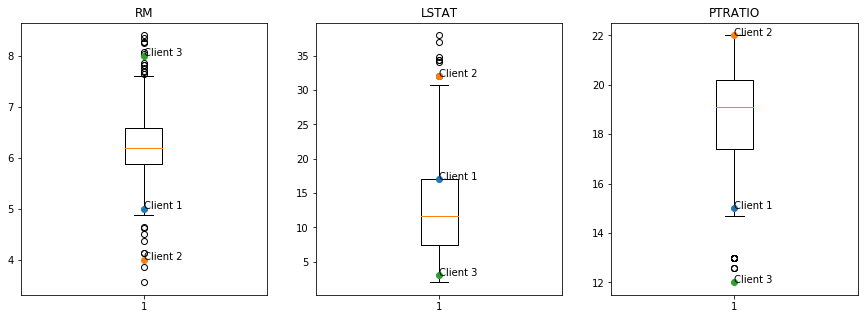

In [16]:
# courtesy of the first reviewer

plt.figure(figsize=(15,5))

for i, col in enumerate(features.columns):
    plt.subplot(1,3,i+1)
    plt.boxplot(data[col])
    plt.title(col)
    for j in range(3):
        plt.plot(1, client_data[j][i], marker='o')
        plt.annotate('Client %s' % str(j+1), xy=(1, client_data[j][i]))

> Client 2 has the smallest house (with 4 rooms) which is located in a neighborhood with high poverty rate and large student-teacher ratio. All these will place the value of this home in the lower range of prices. I would say that the minimum price for this house is about 130276.  

> On the other side, Client 3 has the largest house (with 8 rooms), it is located in a neighborhood with low poverty rate and low student-teacher ratio. This house will most likely sell for a price that is in the upper range of values. I would evaluate this house using the average between 778409 (the upper end of the confidence interval) and 1024800 (the maximum value of MEDV in the dataset) which is 901604.

> Regarding Client's 1 home. It has 5 rooms, more than 4 (as Client 2 has) but 3 fewer rooms than Client 3 whose house has 8 rooms. From this point of view, the home has a value that is lower than the median MEDV. The poverty rate is half way between the ones where Client 2 and  Client 3 reside. While the student-teacher ratio is not much higher than the one in the upscale neighborhood where Client's 3 house is. Taking all these into account, in my opinion Client's 1 home has a value which is at most the median MEDV, that is 438900.

> After comparing with the model's predictions, I notice that for Client 1 and Client 3, the model predicts values that are within 30000 of my estimations. All these prices seem reasonable given the features these homes have. In my estimations I did not take into account any of the features' statistics (minimum and maximum poverty rates, or student-teacher ratio for example) I think the differences in these estimations are acceptable.

> My estimation for Client's 2 home is much lower than the one predicted by the model. In my opinion, the model estimation seems more reasonable for a home with 4 rooms in a city like Boston which has high real estate prices.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [17]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **

>_In my opinion the model we constructed is too simplistic and inaccurate to be used in real world setting._ 

>_The data is not up-to-date and thus not accurate for today's real estate market._ The data was collected in 1978 and although the MEDV was adjusted to take into account the inflation, there are other factors to consider. For example, I expect that both the percentage of low income population LSTAT and the student-teacher ratio PTRATIO significantly changed in some of these neighborhoods. Factors as development or remodelling affect the average number of rooms RM in a  community, especially for such an extended period of time.

>_The features included in this dataset are not clearly defined and insufficient to describe a home._ First, 'number of rooms' is ambiguous, as it does not specify exactly if it refers to bedrooms only, or any rooms in a home. It would be more useful to have information on number of bedrooms, bathrooms and other areas (such as office, den, pantry, etc.). Other essential features to consider would be: square feet, information on the yard, garage or available parking, central heating or cooling system, to mention a few. Of course, there is the problem of selecting too many features also. A good real worls model should be flexible enough to allow selection of a subset of features that are relevant to a particular client or search. 

> _It is not fair to judge the value of the home based on the neighborhood data._ First, it has to be clearly specified how the neighborhoods are defined. Although, the neighborhood plays an important role in determining the value of a home, this is not the only factor. One should also take into account factors such as the quality of the home or where the house is located in this neighborhood. 

> _The model is not robust enough_, given that after running the function 10 times the prices vary by more than 70000 dollars. 

> _The data does not consist of a random sample for the entire country._ Since this data was collected from the neighborhoods of Boston, the model would be applicable at best in other large cities with high real estate prices. Even then, other factors might significantly influence the home values. This data is not representative for smaller cities, or in states where the land value might be significantly different.    

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.